In [35]:
from test import test
import sys
sys.path.append('..')
import action

handle = open("new_examples.txt", "r")
text = handle.read()
handle.close()
list_, N = [0], 0
for i in range(len(text)):
    if text[i] == '.':
        last = i
    N += 1
    if N > 10000:
        list_.append(last)
        N = 0
        
print(len(text) / 10000)
root_list = []
for i in range(len(list_) - 1):
    print(i)
    root_list = root_list + action.construct_tree(text[list_[i] : list_[i + 1]])

list_ = test(root_list)
print(len(list_))

14.1135
0
1
2
3
4
5
6
7
8
9
10
11
12
13
248


In [14]:
def sub(name, list_):
    if name in list_:
        return 1
    return 0

dict_ = dict()
keys_1 = ['case', 'punct', 'nmod', 'advmod', 'parataxis', 'obl', 'nsubj', 'obj', 'ccomp', 'nsubj:pass', 'cc', 'det', 'iobj', 'advcl', 'aux:pass', 'mark', 'conj', 'discourse', 'acl:relcl']
keys_2 = ['ADJ', 'SCONJ', 'AUX', 'ADP', 'DET', 'PUNCT', 'NOUN', 'CCONJ', 'ADV', 'PROPN', 'VERB', 'PRON', 'PART', 'NUM']
keys_3 = ['ParentPROPN', 'ParentNUM', 'ParentNOUN', 'ParentVERB', 'ParentNon', 'ParentAUX', 'ParentPUNCT', 'ParentPRON']

dict_['Sentence'], dict_['Lemma'], dict_['Token'] = [], [], []
for i in (keys_1 + keys_2 + keys_3):
    dict_[i] = []
for i in list_:
    dict_['Sentence'].append(i[0])
    dict_['Lemma'].append(i[1])
    dict_['Token'].append(i[2])
    for j in keys_1:
        dict_[j].append(sub(j, [k[1] for k in i[3]]))
    for j in keys_2:
        dict_[j].append(sub(j, [k[0].value.postag for k in i[3]]))
    for j in keys_3:
        dict_[j].append(sub('Parent' + i[4], [j]))
import pandas as pd
df = pd.DataFrame(data = dict_)
df.to_csv('Part_2.csv', index = False, encoding = 'utf')

NameError: name 'list_' is not defined

In [45]:
import pandas as pd
import numpy as np
df = pd.read_csv('Part_mark_2.csv')
del df['Sentence']
del df['Lemma']
del df['Token']
y = df['Answer']
del df['Answer']
array = df.as_matrix()
print(array.shape)

(248, 41)


/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(248, 2)


<IPython.core.display.Javascript object>


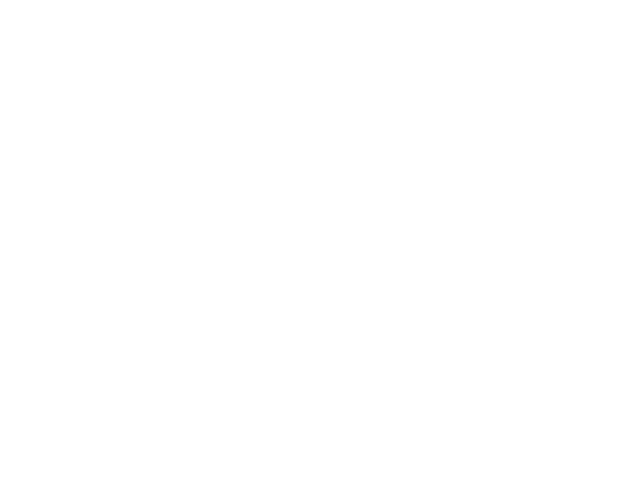

149


In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

% matplotlib notebook
data = array.copy()
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
print(data.shape)
plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 1],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 1],
         'bo')
print(len([data[i][0] for i in range(data.shape[0]) if y[i] == 1]))
plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 0],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 0],
         'ro')

plt.legend(['Participle', 'Non-participle'])


<IPython.core.display.Javascript object>


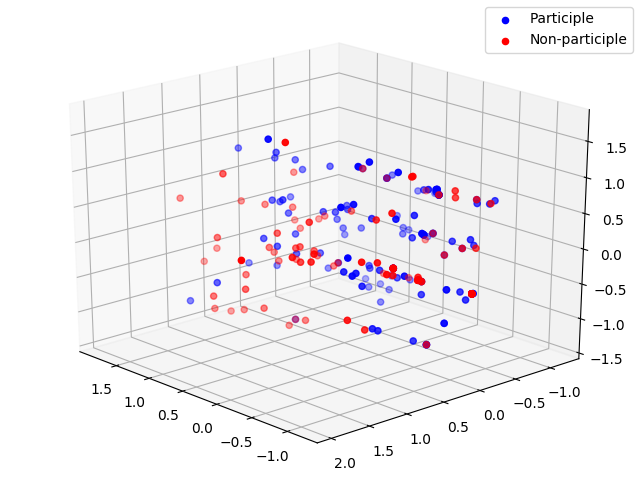

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
% matplotlib notebook
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 1]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 1]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 1]
ax.scatter(xs, ys, zs, c = 'b')

xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 0]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 0]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 0]
ax.scatter(xs, ys, zs, c= 'r')
plt.legend(['Participle', 'Non-participle'])


## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs

data = array.copy()
Y = y
est = KFold(shuffle = True, n_splits = 5)
clf = KNN(n_neighbors = 4)
acc_1 = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'precision')))
print(acc_1)


0.6768486305653206


## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier as RFC
for i in range(1, 50):
    clf = RFC(n_estimators = i)
    acc_1 = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'precision')))
    print(i, acc_1)

1 0.7450610079575596
2 0.775094017094017
3 0.7247054327054328
4 0.7091341729928686
5 0.6834850494333253
6 0.6956709956709957
7 0.6558402457757296
8 0.687874276261373
9 0.6827285677285677
10 0.6746258435462471
11 0.7079388891153597
12 0.7068668668668668
13 0.6869633353504323
14 0.674320144465335
15 0.713072237365897
16 0.7064493680761429
17 0.7162462462462462
18 0.7436099439775911
19 0.6917354767994155
20 0.723890756302521
21 0.7041887223311027
22 0.7436185505262257
23 0.6919117647058823
24 0.698686580187956
25 0.6857322951427511
26 0.6971794871794872
27 0.6993151728445847
28 0.7119259119259119
29 0.7385149572649572
30 0.7019992910315491
31 0.7100439958592133
32 0.726586229086229
33 0.7117257343550446
34 0.7051794815907718
35 0.7109918540241121
36 0.6964089635854341
37 0.7390544252532083
38 0.7318787335722818
39 0.7043609022556391
40 0.7370908004778973
41 0.7024722238194723
42 0.6912456606574254
43 0.7348557774364227
44 0.7186727537168713
45 0.6833333333333333
46 0.680781490015361
47 0.